# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline

In [3]:
keras.__version__

'2.8.0'

In [4]:
tf.__version__

'2.8.2'

# Load Data

In [5]:
from sklearn.datasets import fetch_california_housing

In [6]:
housing = fetch_california_housing()

In [7]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

# Trian, Validation, Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# Data Standardization

In standardizing, we subtract the mean of each variable from their individual values. And then we also divide it by the variance because at the end we want all the variables with mean as zero and their variance as one 1

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Model Creation

## Building Neural Network for Regression Problem

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

In [16]:
X_train.shape

(11610, 8)

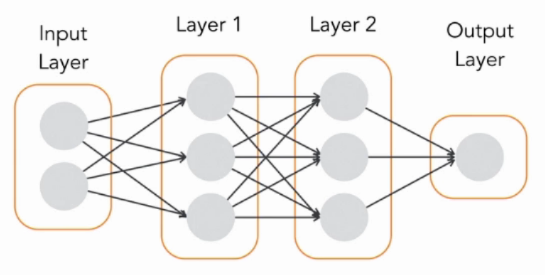

In [17]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

2022-10-28 17:11:35.042224: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-28 17:11:35.050361: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


since this is our first written layer, we need to provide the input shape since the number of independent variables in our data is eight. We will be using input shape equal to 8.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


Now, if you want to **look** at our **neural network**, you can do that using **pydot**.

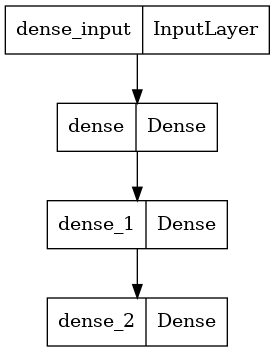

In [19]:
import pydot
keras.utils.plot_model(model)

## Training Neural Network Model

In [21]:
model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

In [27]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [28]:
model_history.params

{'verbose': 1, 'epochs': 20, 'steps': 363}

In [29]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.3828714191913605,
  0.3807542622089386,
  0.3787873685359955,
  0.37684252858161926,
  0.37485167384147644,
  0.37324926257133484,
  0.37154120206832886,
  0.3699616491794586,
  0.36844807863235474,
  0.3671078085899353,
  0.3658638894557953,
  0.36476749181747437,
  0.36347660422325134,
  0.3621712028980255,
  0.3612859547138214],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.44390347599983215,
  0.4425695538520813,
  0.4414600133895874,
  0.4398252069950104,
  0.43846991658210754,
  0.4375317394733429,
  0.4359448254108429,
  0.4347251355648041,
  0.43356841802597046,
  0.4326536953449249,
  0.43151575326919556,
  0.43066659569740295,
  0.430464506149292,
  0.42939281463623047,
  0.4283788502216339,
  0.4272269904613495,
  0.42688339948654175],
 'val_loss': [0.3695237934589386,
  0.36980190873146057,
  0.364663690328598,
  0.36321303

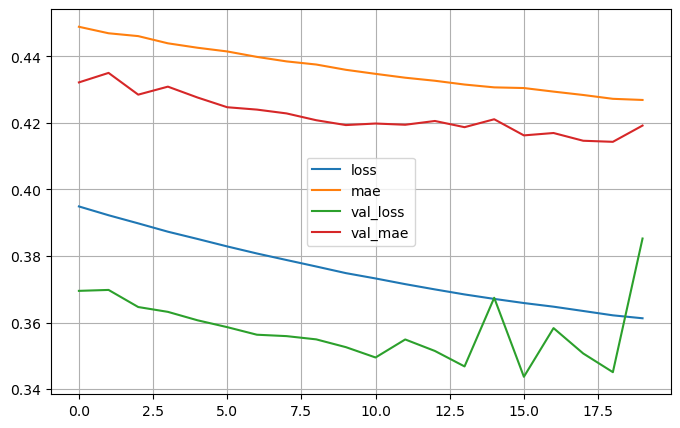

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid()

one thing to notice is this graph is still going down, meaning that if we run some more epochs, this will further decrease the losses and improve the accuracy of our model. So this is the one way to tell whether you have achieved convergence or not or whether you have to increase your epoch value or not.

So to improve the accuracy, we can re run this code to Run it for 20 more epochs. Now, one important thing about keras is, keras have the weights and Bias's value in the memory. So if you just re run this statement (fit), again, this will not train the data from start. So if we run this statement two times that is similar to running a statement with 40 epochs.

## Evaluating Performance

In [31]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3596 - mae: 0.4269


## Prediction

In [32]:
X_new = X_test[:3]

In [33]:
y_pred = model.predict(X_new)
y_pred

array([[0.60719675],
       [1.8601832 ],
       [3.7924948 ]], dtype=float32)